<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml06_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 선형 회귀

특성(독립변수)가 여러 개인 선형 회귀 모델
* 1차항만 고려한 선형 회귀
* 고차항들을 포함하는 선형 회귀
* 규제(Regularization): overfitting(과대적합)을 줄이기 위한 기법

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [2]:
# 데이터 셋 github URL
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [3]:
# DataFrame 생성
fish = pd.read_csv(fish_csv)

In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


선형 회귀 목적: 농어(Perch)의 무게(Weight)를 농어의 다른 특성들(Length, Diagonal, Height, Width)로 예측.

Weight ~ Length + Diagonal + Height + Width

In [6]:
perch = fish[fish.Species == 'Perch']  # 농어(Perch)만 선택
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [7]:
# 특성(features), 독립 변수
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values

In [8]:
X.shape

(56, 4)

In [9]:
# label, target, 종속 변수
y = perch['Weight'].values

In [10]:
y.shape

(56,)

# train/test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [12]:
X_train.shape, X_test.shape

((42, 4), (14, 4))

In [13]:
y_train.shape, y_test.shape

((42,), (14,))

# 1차항만 고려하는 선형 회귀

$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$

In [14]:
lin_reg = LinearRegression()  # 선형 회귀 알고리즘 생성

In [15]:
lin_reg.fit(X_train, y_train)  # ML 알고리즘을 데이터에 fitting. 데이터를 학습시킴.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.intercept_  # w0: 절편, 편향

-610.0275364260526

In [17]:
lin_reg.coef_  # [w1 w2 w3 w4] 계수들의 배열
# w1 * length + w2 * diagonal + w3 * height + w4 * width

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [18]:
train_pred = lin_reg.predict(X_train)  # 훈련 셋 예측값

In [19]:
train_pred[:5]

array([ 50.07831254, 149.63115115,  26.52323981, -11.85322276,
       727.07849472])

In [20]:
y_train[:5]  # 실젯값

array([ 85., 135.,  78.,  70., 700.])

In [21]:
# RMSE
np.sqrt(mean_squared_error(y_train, train_pred))

73.07651173088374

In [22]:
# 결정 계수
r2_score(y_train, train_pred)

0.9567246116638569

In [23]:
test_pred = lin_reg.predict(X_test)  # 테스트 셋 예측값

In [24]:
test_pred[:5]

array([-334.87262176,   53.65873458,  318.38723843,  178.88939119,
        155.66294578])

In [25]:
y_test[:5]  # 테스트 셋 실젯값

array([  5.9, 100. , 250. , 130. , 130. ])

In [26]:
np.sqrt(mean_squared_error(y_test, test_pred))  # RMSE

110.1835310901991

In [27]:
r2_score(y_test, test_pred)  # 결정 계수

0.879046561599027

1차항만 고려한 선형 회귀 모델은 overfitting이 약간 있음.

# 2차항까지 추가한 선형 회귀

$
\hat{y} = w_0 + w_1 \times x_1 + \cdots + w_4 \times x_4 + w_5 \times x_1^2 + \cdots + w_{14} \times x_4^2
$


In [28]:
poly = PolynomialFeatures(include_bias=False)  # 다차항을 추가하는 변환기 생성
# degree=2 (default): 2차항까지 고려
# interaction_only=False (default): x1^2, x2^2, x1*x2, ... 등을 모두 추가

In [29]:
poly.fit_transform(X_train)[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        384.16      , 407.68      , 100.69696   ,  59.52128   ,
        432.64      , 106.86208   ,  63.16544   ,  26.39493376,
         15.60186368,   9.22215424],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        484.        , 517.        , 129.25      ,  77.55      ,
        552.25      , 138.0625    ,  82.8375    ,  34.515625  ,
         20.709375  ,  12.425625  ]])

In [30]:
scaler = StandardScaler()  # 표준화 변환기 생성

In [31]:
lin_reg = LinearRegression()  # ML 알고리즘 생성

In [32]:
# Pipeline 객체 생성
model = Pipeline(steps=[('poly', poly),
                        ('scaler', scaler),
                        ('lin_reg', lin_reg)])

In [33]:
# ML 모델을 데이터에 fitting. 학습 셋을 훈련시킴.
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [34]:
model['lin_reg'].intercept_  # 학습이 끝난 후 선형 회귀 모델이 찾은 절편

400.83333333332587

In [35]:
model['lin_reg'].coef_  # 학습이 끝난 후 선형 회귀 모델이 찾은 계수들(coefficients)

array([   -443.26816039,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558536, -210083.78541706,
        -49872.08633924,   29100.85132271,   91656.18352525,
         53699.90248992,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [36]:
model['poly'].get_feature_names()  # PolynomialFeatures 변환기가 만들어낸 다차항들 리스트

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [37]:
train_pred = model.predict(X_train)  # 훈련 셋 예측값

In [38]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [39]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [40]:
np.sqrt(mean_squared_error(y_train, train_pred))  # 훈련 셋 RMSE

31.408812188346158

In [41]:
r2_score(y_train, train_pred)  # 훈련 셋 결정 계수

0.9920055538341124

In [42]:
test_pred = model.predict(X_test)

In [43]:
test_pred[:5]

array([ 23.11093892,  16.86703258, 283.14558245, 126.83444969,
       121.43654058])

In [44]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [45]:
np.sqrt(mean_squared_error(y_test, test_pred))  # 테스트 셋 RMSE

71.36392024375351

In [46]:
r2_score(y_test, test_pred)  # 테스트 셋 결정 계수

0.949260960155265

# 5차항까지 고려한 선형 회귀

In [47]:
poly = PolynomialFeatures(degree=5, include_bias=False)  # Transformer
scaler = StandardScaler()  # Transformer
lin_reg = LinearRegression()  # Estimator
model = Pipeline(steps=[('poly', poly),
                        ('scaler', scaler),
                        ('reg', lin_reg)])  # Pipeline ---> ML 모델(알고리즘)

In [48]:
model.fit(X_train, y_train)  # 모델 학습

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [49]:
train_pred = model.predict(X_train)  # 예측
train_pred[:5]

array([ 85.00000001, 135.00000001,  78.00000001,  70.00000001,
       699.99999999])

In [50]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [51]:
np.sqrt(mean_squared_error(y_train, train_pred))  # RMSE

6.451254436565875e-09

In [52]:
r2_score(y_train, train_pred)  # 결정 계수

1.0

In [53]:
test_pred = model.predict(X_test)
test_pred[:5]

array([11371.40140121,  2337.27796403,   202.4010845 ,   407.75145864,
         108.73923664])

In [54]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [55]:
np.sqrt(mean_squared_error(y_test, test_pred))

3768.2193148209044

In [56]:
r2_score(y_test, test_pred)

-140.4676661620923

고차항이 많아질 수록 overfitting(과대적합)이 더 심해지는 경향이 있다.

# 규제(Regularization)

* `l2` 규제(Ridge)
* `l1` 규제(Lasso)
* ElasticNet 규제


문제를 간단히 하기 위해서 농어 Weight ~ Length 선형 회귀 문제.

In [59]:
y = perch['Weight'].values  # target

In [62]:
X = perch[['Length']].values  # feature

In [63]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

## 규제가 없는 선형 회귀

degree=1, W=[340.55381311]
degree=2, W=[-188.16429447  532.30423546]
degree=5, W=[ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
degree=100, W=[ 2.00557630e+10 -2.58408022e+11  1.49532847e+12 -4.90418675e+12
  9.34291430e+12 -8.67392996e+12 -7.82611682e+11  7.69668003e+12
 -5.58109456e+09 -6.79558407e+12 -2.46010065e+12  4.99817517e+12
  5.20423172e+12 -1.63569143e+11 -5.04386991e+12 -4.58103039e+12
 -2.92727936e+11  3.58006339e+12  4.82124023e+12  2.56502444e+12
 -1.02653972e+12 -3.84050839e+12 -4.08225740e+12 -2.38407359e+12
  1.98148411e+11  2.61238310e+12  3.62406355e+12  3.27104682e+12
  1.54929950e+12 -4.44063972e+11 -2.07165132e+12 -3.00069992e+12
 -3.00183843e+12 -2.13789600e+12 -6.78418491e+11  7.14760716e+11
  2.02103482e+12  2.55576738e+12  2.52470076e+12  1.91395216e+12
  1.04869405e+12  8.39890755e+10 -9.16363136e+11 -1.73570552e+12
 -2.04897502e+12 -2.09658188e+12 -1.65299115e+12 -1.16987146e+12
 -4.25185309e+11  2.76530253e+11  9.12030793e+1

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


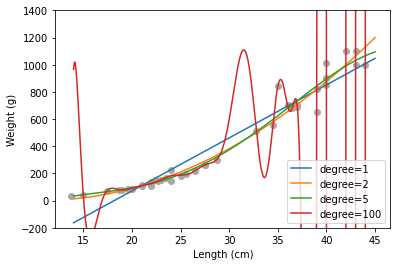

In [78]:
degrees = (1, 2, 5, 100)
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    # ML 모델 생성
    model = Pipeline(steps=[('poly', poly),
                            ('scaler', scaler),
                            ('reg', lin_reg)])
    model.fit(X_train, y_train)  # 모델 학습
    print(f'degree={d}, W={model["reg"].coef_}')

    # 선형 회귀 곡선 시각화(1차 함수, 2차 함수, ...)
    # 곡선을 그리기 위한 x 좌표들
    X_values = np.arange(14, 45, 0.001).reshape((-1, 1))  # (n_smaples, 1) shape의 2d array
    # 곡선을 그리기 위한 y 좌표들
    y_values = model.predict(X_values)
    plt.plot(X_values, y_values, label=f'degree={d}')

# 훈련 데이터 시각화 (Weight ~ Length)
plt.scatter(X_train, y_train, color='darkgray')

# 그래프 customizing
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.ylim((-200, 1400))
plt.legend()
plt.show()